In [1]:
import os, shutil
import json
import random
import pandas as pd 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import keras.utils as image

# Preprocessing

In [2]:
yelp_dir = '/Users/ingridamerica/Downloads/yelp_dataset'
yelp_path_business = os.path.join(yelp_dir, 'yelp_academic_dataset_business.json')
yelp_path_review = os.path.join(yelp_dir, 'yelp_academic_dataset_review.json')
yelp_path_photos = os.path.join(yelp_dir, 'photos.json')



In [3]:
business_data = pd.read_json(yelp_path_business, lines= True)
business_data.drop(columns =['address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'hours'])

,business_id,name,attributes,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food"
...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas"
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut..."
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician..."


In [4]:
photo_data = pd.read_json(yelp_path_photos, lines = True)
photo_data

,photo_id,business_id,caption,label
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside
1,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food
...,...,...,...,...
200095,4Zia9NkAfQNjMfcIDhwJ-g,2HxkdqHmbYGj_BH1bLaiSw,#Nektar,food
200096,KB96KRZRhRm8hUkI-OpGEA,_gVyuTRb_6HM-SNtqbpevQ,,inside
200097,Klmojvaf2_2dP1XKzTsFmQ,NUyEOjfAl3HvkpzSpdwqeA,,food
200098,FNEiq7Mogec7t31OaU5juw,hE6YsHHV0fCz_UrGS4o6VA,Drinks by the water!,drink


In [5]:
business_with_photos = business_data.merge(photo_data, on = 'business_id', how = 'outer')
business_with_photos

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,photo_id,caption,label
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",N3tTxsgpFH91wzo4gZm19A,,food
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",7urDyNpZZ3Z8RpKLruaCNQ,,food
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313761,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3...",NaN,NaN,NaN
313762,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3...",NaN,NaN,NaN
313763,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None,NaN,NaN,NaN
313764,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...",NaN,NaN,NaN


In [6]:
cols = ['review_id', 'business_id', 'text' ]

data = []
with open(yelp_path_review, encoding='latin-1') as f:
    for line in f:
        doc = json.loads(line)
        lst = [doc['review_id'], doc['business_id'], doc['text']]
        data.append(lst)

df = pd.DataFrame(data=data, columns=cols)
df

,review_id,business_id,text
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,"If you decide to eat here, just be aware it is..."
1,BiTunyQ73aT9WBnpR9DZGw,7ATYjTIgM3jUlt4UM3IypQ,I've taken a lot of spin classes over the year...
2,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,Family diner. Had the buffet. Eclectic assortm...
3,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,"Wow! Yummy, different, delicious. Our favo..."
4,Sx8TMOWLNuJBWer-0pcmoA,e4Vwtrqf-wpJfwesgvdgxQ,Cute interior and owner (?) gave us tour of up...
...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,jals67o91gcrD4DC81Vk6w,Latest addition to services from ICCU is Apple...
6990276,shTPgbgdwTHSuU67mGCmZQ,2vLksaMmSEcGbjI5gywpZA,"This spot offers a great, affordable east week..."
6990277,YNfNhgZlaaCO5Q_YJR4rEw,R1khUUxidqfaJmcpmGd4aw,This Home Depot won me over when I needed to g...
6990278,i-I4ZOhoX70Nw5H0FwrQUA,Rr9kKArrMhSLVE9a53q-aA,For when I'm feeling like ignoring my calorie-...


In [7]:
business_with_reviews = pd.merge(business_with_photos,df, on ='business_id',how ='outer')
business_with_reviews

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,photo_id,caption,label,review_id,text
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,NaN,NaN,NaN,9vwYDBVI3ymdqcyJ5WW2Tg,I've had acupuncture treatments with Abby over...
1,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,NaN,NaN,NaN,OXgg1LdxHDv3CBU5-xi2lA,Abby is an amazing practitioner. In a treatmen...
2,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,NaN,NaN,NaN,DG64cjud9cWB4fANskVxSw,I went to see Abby for some digestive issues. ...
3,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,NaN,NaN,NaN,hzvRRb40oPttxAdyr7kfow,"Abby helped me with some longstanding issues, ..."
4,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,NaN,NaN,NaN,xUkBPk-QfcW4i3MRU5TeXw,"Recently, I referred a patient of mine with mu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77729389,jV_XOycEzSlTx-65W906pg,Sic Ink,238 Apollo Beach Blvd,Apollo beach,FL,33572,27.771002,-82.394910,4.5,9,1,"{'WheelchairAccessible': 'True', 'BusinessAcce...","Beauty & Spas, Permanent Makeup, Piercing, Tattoo","{'Tuesday': '12:0-19:0', 'Wednesday': '12:0-19...",NaN,NaN,NaN,b4lUxYu-8yBkq8H4NgzS2A,It is with my greatest pleasure to say that I'...
77729390,jV_XOycEzSlTx-65W906pg,Sic Ink,238 Apollo Beach Blvd,Apollo beach,FL,33572,27.771002,-82.394910,4.5,9,1,"{'WheelchairAccessible': 'True', 'BusinessAcce...","Beauty & Spas, Permanent Makeup, Piercing, Tattoo","{'Tuesday': '12:0-19:0', 'Wednesday': '12:0-19...",NaN,NaN,NaN,5gE7ACSqGdQSaiS75Nl_tw,I went there to get my nose piercing replaced....
77729391,jV_XOycEzSlTx-65W906pg,Sic Ink,238 Apollo Beach Blvd,Apollo beach,FL,33572,27.771002,-82.394910,4.5,9,1,"{'WheelchairAccessible': 'True', 'BusinessAcce...","Beauty & Spas, Permanent Makeup, Piercing, Tattoo","{'Tuesday': '12:0-19:0', 'Wednesday': '12:0-19...",NaN,NaN,NaN,34FBVC0N2M-7r2aCZnXecA,Fantastic tattoo artist. Friendly and talkativ...
77729392,jV_XOycEzSlTx-65W906pg,Sic Ink,238 Apollo Beach Blvd,Apollo beach,FL,33572,27.771002,-82.394910,4.5,9,1,"{'WheelchairAccessible': 'True', 'BusinessAcce...","Beauty & Spas, Permanent Makeup, Piercing, Tattoo","{'Tuesday': '12:0-19:0', 'Wednesday': '12:0-19...",NaN,NaN,NaN,VSMXMQ8qOauSGS4sC_4XHQ,"Please note, this studio has relocated to Apol..."


### Filtering our data to only coffee shops

In [8]:
coffee_data = business_with_reviews.loc[business_with_reviews['categories'].str.contains('Coffee', na= False)]
coffee_data.reset_index(drop =True, inplace = True)


### 

In [9]:
#labeling the popular coffee shops (index 0)
labeled_popular_coffee = coffee_data.copy()
major_chain = ['The Coffee Bean and Tea Leaf', 'Tim Hortons', 'Biggby Coffee', 
               'Dutch Bros', 'Dunkin', 'Peets Coffee', 'Caribou Coffee', 'Starbucks' ]
pattern = '|'.join(major_chain)
labeled_popular_coffee['label_class'] = None
labeled_popular_coffee.loc[labeled_popular_coffee['name'].str.contains(pattern), 'label_class'] = 0 
labeled_popular_coffee = labeled_popular_coffee.drop(columns =['address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'hours', 'caption'], axis =1)

labeled_popular_coffee

,business_id,name,attributes,categories,photo_id,label,review_id,text,label_class
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",N3tTxsgpFH91wzo4gZm19A,food,BXQcBN0iAi1lAUxibGLFzA,This is nice little Chinese bakery in the hear...,None
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",N3tTxsgpFH91wzo4gZm19A,food,uduvUCvi9w3T2bSGivCfXg,This is the bakery I usually go to in Chinatow...,None
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",N3tTxsgpFH91wzo4gZm19A,food,a0vwPOqDXXZuJkbBW2356g,"A delightful find in Chinatown! Very clean, an...",None
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",N3tTxsgpFH91wzo4gZm19A,food,MKNp_CdR2k2202-c8GN5Dw,I ordered a graduation cake for my niece and i...,None
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",N3tTxsgpFH91wzo4gZm19A,food,D1GisLDPe84Rrk_R4X2brQ,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,None
...,...,...,...,...,...,...,...,...,...
7338143,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,"{'BusinessParking': '{'garage': False, 'street...","Specialty Food, Food, Coffee & Tea, Coffee Roa...",9uaBaByAMUJS8PBiPC57hQ,outside,GgUyYrW9NgqRxgbR-iRv_A,The coffee here is delicious and I love the at...,None
7338144,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,"{'BusinessParking': '{'garage': False, 'street...","Specialty Food, Food, Coffee & Tea, Coffee Roa...",9uaBaByAMUJS8PBiPC57hQ,outside,tNDn3dD4XQ0me6DaDWPgOw,If you ever find yourself in Tucson wanting a ...,None
7338145,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,"{'BusinessParking': '{'garage': False, 'street...","Specialty Food, Food, Coffee & Tea, Coffee Roa...",9uaBaByAMUJS8PBiPC57hQ,outside,IEBqOU967RCgzypFUoBXcw,"I meet my friends, sit outside at the tables, ...",None
7338146,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,"{'BusinessParking': '{'garage': False, 'street...","Specialty Food, Food, Coffee & Tea, Coffee Roa...",9uaBaByAMUJS8PBiPC57hQ,outside,5s4Lz9XSviVshyzEw-KYwg,"Great coffee, and fun to stay and get a Frenc...",None


#### Labeling specialty coffee shops

In [10]:
keywords = ['cortado', 'Gibraltar', 'flat white', 'single origin']
pattern2 = '|'.join(keywords)

labeled_specialty = labeled_popular_coffee.copy()
labeled_specialty.loc[labeled_specialty['text'].str.contains(pattern2, na = False), 'label_class'] = 1
labeled_specialty

,business_id,name,attributes,categories,photo_id,label,review_id,text,label_class
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",N3tTxsgpFH91wzo4gZm19A,food,BXQcBN0iAi1lAUxibGLFzA,This is nice little Chinese bakery in the hear...,None
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",N3tTxsgpFH91wzo4gZm19A,food,uduvUCvi9w3T2bSGivCfXg,This is the bakery I usually go to in Chinatow...,None
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",N3tTxsgpFH91wzo4gZm19A,food,a0vwPOqDXXZuJkbBW2356g,"A delightful find in Chinatown! Very clean, an...",None
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",N3tTxsgpFH91wzo4gZm19A,food,MKNp_CdR2k2202-c8GN5Dw,I ordered a graduation cake for my niece and i...,None
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",N3tTxsgpFH91wzo4gZm19A,food,D1GisLDPe84Rrk_R4X2brQ,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,None
...,...,...,...,...,...,...,...,...,...
7338143,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,"{'BusinessParking': '{'garage': False, 'street...","Specialty Food, Food, Coffee & Tea, Coffee Roa...",9uaBaByAMUJS8PBiPC57hQ,outside,GgUyYrW9NgqRxgbR-iRv_A,The coffee here is delicious and I love the at...,None
7338144,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,"{'BusinessParking': '{'garage': False, 'street...","Specialty Food, Food, Coffee & Tea, Coffee Roa...",9uaBaByAMUJS8PBiPC57hQ,outside,tNDn3dD4XQ0me6DaDWPgOw,If you ever find yourself in Tucson wanting a ...,None
7338145,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,"{'BusinessParking': '{'garage': False, 'street...","Specialty Food, Food, Coffee & Tea, Coffee Roa...",9uaBaByAMUJS8PBiPC57hQ,outside,IEBqOU967RCgzypFUoBXcw,"I meet my friends, sit outside at the tables, ...",None
7338146,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,"{'BusinessParking': '{'garage': False, 'street...","Specialty Food, Food, Coffee & Tea, Coffee Roa...",9uaBaByAMUJS8PBiPC57hQ,outside,5s4Lz9XSviVshyzEw-KYwg,"Great coffee, and fun to stay and get a Frenc...",None


In [11]:
test = labeled_specialty[labeled_specialty['label_class']==1]
test.describe()

,business_id,name,attributes,categories,photo_id,label,review_id,text,label_class
count,23172,23172,23167,23172,23113,23113,23172,23172,23172
unique,564,464,551,403,5548,5,1411,1411,1
top,PWWGbkPC_agn-4s1Hv1W5A,Handlebar Coffee Roasters,"{'BusinessParking': '{'garage': False, 'street...","Food, Coffee & Tea",euKd_2dCAJE54-okH4zslA,inside,qnz644Ilpa9zryLIdOpH5w,This was my first time to Suraya and it did no...,1
freq,2000,2060,2000,2707,61,11693,157,157,23172


#### Labeling specialty coffee shops based off a list

In [12]:
specialty_shops = [
    'Stumptown Coffee Roasters', 'La Colombe', 'Counter Culture Coffee', 
    'Bicycle Coffee', 'Caffe Luxxe', 'Bean Bar', 'Black Rock Coffee Bar', 'Peddler', 
    'Roost', 'Joe', 'Sisters', 'The Mill', 'The French Laundry'
]
pattern3 = '|'.join(specialty_shops)
data_specialty = labeled_specialty.copy()
data_specialty.loc[data_specialty['name'].str.contains(pattern3, na = False), 'label_class'] = 1
data_specialty

,business_id,name,attributes,categories,photo_id,label,review_id,text,label_class
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",N3tTxsgpFH91wzo4gZm19A,food,BXQcBN0iAi1lAUxibGLFzA,This is nice little Chinese bakery in the hear...,None
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",N3tTxsgpFH91wzo4gZm19A,food,uduvUCvi9w3T2bSGivCfXg,This is the bakery I usually go to in Chinatow...,None
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",N3tTxsgpFH91wzo4gZm19A,food,a0vwPOqDXXZuJkbBW2356g,"A delightful find in Chinatown! Very clean, an...",None
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",N3tTxsgpFH91wzo4gZm19A,food,MKNp_CdR2k2202-c8GN5Dw,I ordered a graduation cake for my niece and i...,None
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",N3tTxsgpFH91wzo4gZm19A,food,D1GisLDPe84Rrk_R4X2brQ,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,None
...,...,...,...,...,...,...,...,...,...
7338143,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,"{'BusinessParking': '{'garage': False, 'street...","Specialty Food, Food, Coffee & Tea, Coffee Roa...",9uaBaByAMUJS8PBiPC57hQ,outside,GgUyYrW9NgqRxgbR-iRv_A,The coffee here is delicious and I love the at...,None
7338144,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,"{'BusinessParking': '{'garage': False, 'street...","Specialty Food, Food, Coffee & Tea, Coffee Roa...",9uaBaByAMUJS8PBiPC57hQ,outside,tNDn3dD4XQ0me6DaDWPgOw,If you ever find yourself in Tucson wanting a ...,None
7338145,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,"{'BusinessParking': '{'garage': False, 'street...","Specialty Food, Food, Coffee & Tea, Coffee Roa...",9uaBaByAMUJS8PBiPC57hQ,outside,IEBqOU967RCgzypFUoBXcw,"I meet my friends, sit outside at the tables, ...",None
7338146,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,"{'BusinessParking': '{'garage': False, 'street...","Specialty Food, Food, Coffee & Tea, Coffee Roa...",9uaBaByAMUJS8PBiPC57hQ,outside,5s4Lz9XSviVshyzEw-KYwg,"Great coffee, and fun to stay and get a Frenc...",None


In [13]:
test = data_specialty[data_specialty['label_class']==1]
test.describe()

,business_id,name,attributes,categories,photo_id,label,review_id,text,label_class
count,100713,100713,100708,100713,100335,100335,100713,100713,100713
unique,597,490,583,429,5650,5,6758,6749,1
top,dzeBiAu0VAaVBbMwcV9GFw,La Colombe Coffee,"{'RestaurantsReservations': 'False', 'HasTV': ...","Restaurants, Food, Creperies, Coffee & Tea, Br...",aXMhiTsQrdIphBAfXU5SEw,inside,qnz644Ilpa9zryLIdOpH5w,This was my first time to Suraya and it did no...,1
freq,24512,32683,24512,24512,766,48078,157,157,100713


#### Removing duplicates

In [14]:
data_specialty = data_specialty.drop_duplicates(subset = ['business_id', 'photo_id'])
data_specialty

,business_id,name,attributes,categories,photo_id,label,review_id,text,label_class
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",N3tTxsgpFH91wzo4gZm19A,food,BXQcBN0iAi1lAUxibGLFzA,This is nice little Chinese bakery in the hear...,None
87,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",7urDyNpZZ3Z8RpKLruaCNQ,food,BXQcBN0iAi1lAUxibGLFzA,This is nice little Chinese bakery in the hear...,None
174,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",50yopBwRIA6zqZU8DLC2ZQ,outside,BXQcBN0iAi1lAUxibGLFzA,This is nice little Chinese bakery in the hear...,None
261,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",EigRJGqW5LDDQo99vjJppA,food,BXQcBN0iAi1lAUxibGLFzA,This is nice little Chinese bakery in the hear...,None
348,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",z0OtsqP2Hy3nKngnfofLZA,food,BXQcBN0iAi1lAUxibGLFzA,This is nice little Chinese bakery in the hear...,None
...,...,...,...,...,...,...,...,...,...
7337942,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,"{'WiFi': ''free'', 'RestaurantsGoodForGroups':...","Cafes, Juice Bars & Smoothies, Coffee & Tea, R...",NaN,NaN,bpMxmRbnMMpkBhiTnNz8_g,I've been a Starbucks queen ever since I can r...,0
7337976,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,"{'BusinessParking': '{'garage': False, 'street...","Specialty Food, Food, Coffee & Tea, Coffee Roa...",MjwN0_NkWPKUmXgnuEvBkQ,inside,Wi4sAEy7-0-v5QVFh98ajQ,I love this coffee shop. The staff is friendl...,None
7338019,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,"{'BusinessParking': '{'garage': False, 'street...","Specialty Food, Food, Coffee & Tea, Coffee Roa...",l5OFqLypFfk0Y6T4az6WZg,inside,Wi4sAEy7-0-v5QVFh98ajQ,I love this coffee shop. The staff is friendl...,None
7338062,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,"{'BusinessParking': '{'garage': False, 'street...","Specialty Food, Food, Coffee & Tea, Coffee Roa...",7FUi41onnsvkxafmGpY7UQ,inside,Wi4sAEy7-0-v5QVFh98ajQ,I love this coffee shop. The staff is friendl...,None


#### removing businesses without any photos

In [15]:
data_specialty = data_specialty.dropna(subset ='photo_id')
data_specialty.describe()

,business_id,name,attributes,categories,photo_id,label,review_id,text,label_class
count,23665,23665,23601,23665,23665,23665,23665,23665,4671
unique,4221,2557,3641,2682,23665,5,4221,4220,2
top,FEXhWNCMkv22qG04E83Qjg,Dunkin',"{'RestaurantsReservations': 'False', 'Alcohol'...","Food, Coffee & Tea",N3tTxsgpFH91wzo4gZm19A,food,5_MTHUvxrQBIDre0SDq6Zg,Delicious out of the world beignets that can b...,0
freq,528,2287,528,1235,1,9229,528,528,4323


#### Creating df of just data with no labels

In [16]:
df_with_missingvalues = data_specialty.loc[data_specialty['label_class'].isna()]
df_with_missingvalues

,business_id,name,attributes,categories,photo_id,label,review_id,text,label_class
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",N3tTxsgpFH91wzo4gZm19A,food,BXQcBN0iAi1lAUxibGLFzA,This is nice little Chinese bakery in the hear...,None
87,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",7urDyNpZZ3Z8RpKLruaCNQ,food,BXQcBN0iAi1lAUxibGLFzA,This is nice little Chinese bakery in the hear...,None
174,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",50yopBwRIA6zqZU8DLC2ZQ,outside,BXQcBN0iAi1lAUxibGLFzA,This is nice little Chinese bakery in the hear...,None
261,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",EigRJGqW5LDDQo99vjJppA,food,BXQcBN0iAi1lAUxibGLFzA,This is nice little Chinese bakery in the hear...,None
348,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",z0OtsqP2Hy3nKngnfofLZA,food,BXQcBN0iAi1lAUxibGLFzA,This is nice little Chinese bakery in the hear...,None
...,...,...,...,...,...,...,...,...,...
7337828,Y0TWCjiiXlFi2XO2cFrUzQ,Connexxions Cafe,"{'RestaurantsReservations': 'True', 'Alcohol':...","Hobby Shops, Tabletop Games, Coffee & Tea, Foo...",QgIZScOqos-4uTw41GGE-g,food,IIKoZck12usbxUNAlzKpGw,Nice to have another board game location and s...,None
7337976,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,"{'BusinessParking': '{'garage': False, 'street...","Specialty Food, Food, Coffee & Tea, Coffee Roa...",MjwN0_NkWPKUmXgnuEvBkQ,inside,Wi4sAEy7-0-v5QVFh98ajQ,I love this coffee shop. The staff is friendl...,None
7338019,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,"{'BusinessParking': '{'garage': False, 'street...","Specialty Food, Food, Coffee & Tea, Coffee Roa...",l5OFqLypFfk0Y6T4az6WZg,inside,Wi4sAEy7-0-v5QVFh98ajQ,I love this coffee shop. The staff is friendl...,None
7338062,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,"{'BusinessParking': '{'garage': False, 'street...","Specialty Food, Food, Coffee & Tea, Coffee Roa...",7FUi41onnsvkxafmGpY7UQ,inside,Wi4sAEy7-0-v5QVFh98ajQ,I love this coffee shop. The staff is friendl...,None


#### Creating df of data with labels 

In [17]:
labeled_data = data_specialty.dropna(subset ='label_class')
labeled_data = labeled_data[labeled_data['label'].str.contains('food', na =False) == False] 
labeled_data.reset_index(drop =True, inplace = True)
labeled_data = labeled_data.drop(columns = ['name', 'attributes', 'categories', 'label', 'review_id', 'text'])
labeled_data

,business_id,photo_id,label_class
0,vxrGNnuEef7YCfB7mN08rA,KeNsTTnKSWrjz-RyZtNJ2A,0
1,vxrGNnuEef7YCfB7mN08rA,YsPKthxNN0K5iHrcpoU4zg,0
2,6_Zf2QsRHCH1RhbzA9inyw,Nohc3-OiZj6jLhX7GoPJ3g,0
3,6_Zf2QsRHCH1RhbzA9inyw,zW7PqF3jA6d680MPsE4f7g,0
4,6_Zf2QsRHCH1RhbzA9inyw,pQJM1uLmWmLSjjtXhaAUlw,0
...,...,...,...
2998,2f1ZnZg7730yChhV24ARJw,mKP02zzHgx2euHcRB3ZmWQ,0
2999,2f1ZnZg7730yChhV24ARJw,L-vzmG6QhE3CJ-ui79nxXQ,0
3000,2f1ZnZg7730yChhV24ARJw,jhO1ZtzFHbZ8ADiP8SdqTw,0
3001,AM7O0cwkxm6w_e0Q7-f9FQ,3fhunJlKjLXZbCvQ86xkXg,0


### Seperating the data into its respective class

In [18]:
specialty_coffee = labeled_data[labeled_data['label_class'] == 1]
specialty_coffee.describe()

,business_id,photo_id,label_class
count,263,263,263
unique,42,263,1
top,MlXH9dWYDFEBbwuGStlfZg,rrxXf6xIuP2J92rVTCOBKA,1
freq,37,1,263


In [19]:
popular_coffee = labeled_data[labeled_data['label_class'] == 0]
popular_coffee.describe()

,business_id,photo_id,label_class
count,2740,2740,2740
unique,1082,2740,1
top,5qVG7T82jRnKGR9O7_0cFw,KeNsTTnKSWrjz-RyZtNJ2A,0
freq,15,1,2740


In [20]:
base_dir = '/Users/ingridamerica/Downloads/coffee_dataset'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
    
train_dir = os.path.join(base_dir,'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
    
validation_dir = os.path.join(base_dir,'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
    
test_dir = os.path.join(base_dir,'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

train_specialty_dir = os.path.join(train_dir, 'specialty')
if not os.path.exists(train_specialty_dir):   
    os.mkdir(train_specialty_dir)

train_popular_dir = os.path.join(train_dir, 'popular')
if not os.path.exists(train_popular_dir):
    os.mkdir(train_popular_dir)
    
validation_specialty_dir = os.path.join(validation_dir, 'specialty')
if not os.path.exists(validation_specialty_dir):
    os.mkdir(validation_specialty_dir)
    
validation_popular_dir = os.path.join(validation_dir, 'popular')
if not os.path.exists(validation_popular_dir):
    os.mkdir(validation_popular_dir)
    
test_specialty_dir = os.path.join(test_dir, 'specialty')
if not os.path.exists(test_specialty_dir):
    os.mkdir(test_specialty_dir)
    
test_popular_dir = os.path.join(test_dir, 'popular')
if not os.path.exists(test_popular_dir):
    os.mkdir(test_popular_dir)
    
    

In [21]:
yelp_photos = os.path.join(yelp_dir, 'photos')

scols = list(specialty_coffee['photo_id'])
training_size =int(len(scols)*0.80)
for i in range(training_size):
        src = os.path.join(yelp_photos, scols[i]+'.jpg')
        dst = os.path.join(train_specialty_dir, scols[i]+'.jpg')
        shutil.copyfile(src, dst)
    
pcols = list(popular_coffee['photo_id'])
for i in range(training_size):
    src = os.path.join(yelp_photos, pcols[i]+'.jpg')
    dst = os.path.join(train_popular_dir, pcols[i]+'.jpg')
    shutil.copyfile(src, dst)

valid_end = int(len(scols)*0.10)+training_size
for i in range(training_size,valid_end):
    src = os.path.join(yelp_photos, scols[i]+'.jpg')
    dst = os.path.join(validation_specialty_dir, scols[i]+'.jpg')
    shutil.copyfile(src, dst)
    
for i in range(training_size,valid_end):
    src = os.path.join(yelp_photos, pcols[i]+'.jpg')
    dst = os.path.join(validation_popular_dir, pcols[i]+'.jpg')
    shutil.copyfile(src, dst)
    
test_end = int(len(scols)*0.10)*2 + training_size 
for i in range(valid_end,test_end ): 
    src = os.path.join(yelp_photos, scols[i]+'.jpg')
    dst = os.path.join(test_specialty_dir, scols[i]+'.jpg')
    shutil.copyfile(src, dst)
    
for i in range(valid_end, test_end):
    src = os.path.join(yelp_photos, pcols[i]+'.jpg')
    dst = os.path.join(test_popular_dir, pcols[i]+'.jpg')
    shutil.copyfile(src, dst)
    
 

print('total training specialty coffee images:', len(os.listdir(train_specialty_dir)))
print('total training popular coffee images:', len(os.listdir(train_popular_dir)))
print('total validation specialty coffee images:', len(os.listdir(validation_specialty_dir)))
print('total validation popular coffee images:', len(os.listdir(validation_popular_dir)))
print('total test specialty coffee images:', len(os.listdir(test_specialty_dir)))
print('total test popular coffee images:', len(os.listdir(test_popular_dir)))   

train_size, validation_size, test_size = 420,52,52

img_width, img_height = 224, 224

total training specialty coffee images: 210
total training popular coffee images: 210
total validation specialty coffee images: 26
total validation popular coffee images: 26
total test specialty coffee images: 26
total test popular coffee images: 26


In [22]:
from keras.applications import VGG16

conv_base = VGG16(weights ='imagenet', include_top = False, input_shape= (img_width, img_height, 3))

conv_base.summary()

Metal device set to: Apple M1
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (N

In [23]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 32

def extract_features(directory, sample_count):
    features = np.zeros(shape = (sample_count, 7,7,512))
    labels = np.zeros(shape = (sample_count))
    labels = labels.astype(int)
    generator = datagen.flow_from_directory(directory, target_size = (img_width, img_height,), batch_size = batch_size, class_mode = 'binary')
    
    i = 0 
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, train_size)
validation_features, validation_labels = extract_features(validation_dir, validation_size)
test_features, test_labels = extract_features(test_dir, test_size)

Found 420 images belonging to 2 classes.


2023-05-25 20:59:38.904255: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 460ms/step
Found 52 images belonging to 2 classes.
1/1 [==============================] - 1s 666ms/step
Found 52 images belonging to 2 classes.
1/1 [==============================] - 0s 40ms/step


In [24]:
print(test_features)
print('Test labels')
print(test_labels)

[[[[7.49974325e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    7.36731172e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    5.92138350e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    3.97726357e-01 0.00000000e+00]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    6.88789010e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    6.31136775e-01 0.00000000e+00]
   [4.27974463e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    7.05473304e-01 0.00000000e+00]]

  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    5.98530352e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 2.66133398e-01 ... 0.00000000e+00
    3.75851214e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 2.47424626e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   ...
   [0.00000000e+00 0.00000000e+00 2.33084607e+00 ... 0.00

In [25]:
from keras import models 
from keras import layers 
from keras import optimizers

epochs = 20

model = models.Sequential()
model.add(layers.Flatten(input_shape = (7,7,512)))
model.add(layers.Dense(256, activation = 'relu', input_dim = (7*7*512)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation = 'sigmoid'))
model.summary()

model.compile(optimizer = optimizers.Adam(), loss ='binary_crossentropy', metrics = ['acc'])

history = model.fit(train_features, train_labels, epochs = epochs, 
                   batch_size = batch_size, validation_data = (validation_features, validation_labels))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 6,423,041
Trainable params: 6,423,041
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
14/14 [==============================] - 2s 74ms/step - loss: 2.0672 - acc: 0.6452 - val_loss: 0.3157 - val_acc: 0.8077
Epoch 2/20
14/14 [=============================

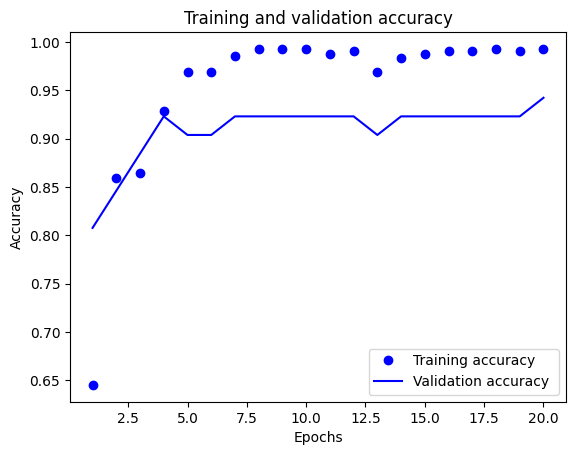

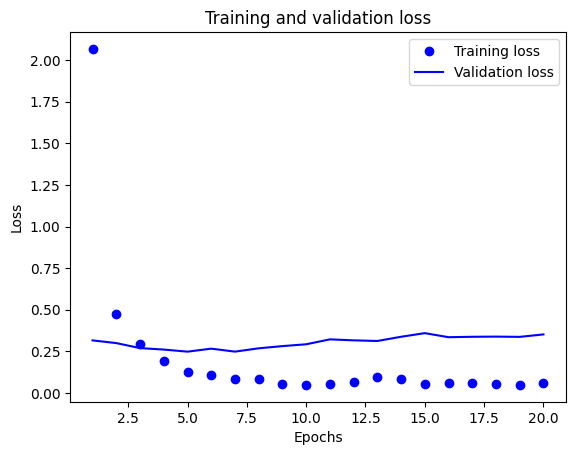

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy ')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [118]:
 import shap

# Define function to visualize predictions
def visualize_predictions(classifier, n_cases):
   
# compute SHAP values
    background = train_features[np.random.choice(train_features.shape[0], 100, replace=False)]
  
    explainer = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)

    
    class_names = ['specialty']
    test_numpy= []

    _, axs = plt.subplots(1, 6, figsize=(16, 15))
    axs = axs.flatten()
    
    for i in range(0,n_cases):
        path = random.choice([test_popular_dir])
        # Get picture
        rand_img = (os.listdir(path))
    
        img_path = os.path.join(path, rand_img[i+12])
        img = image.load_img(img_path, target_size=(img_width, img_height))
        img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
        img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application
        test_numpy.append(img_tensor)
    
        # Extract features
        features = conv_base.predict(img_tensor.reshape(1,img_width, img_height, 3))

        # Make prediction
        try:
            prediction = classifier.predict(features)
        except:
            prediction = classifier.predict(features.reshape(1, 7*7*512))

        # Show picture
        ax = axs[i]
        ax.imshow(img_tensor)
    
        ax.set_axis_off()

        # Write prediction
        if prediction < 0.5:
            ax.set_title(f"True: %s \nPredict: %s" % (path[51:], 'Popular coffee shop'))
        else: 
            ax.set_title(f"True: %s \nPredict: %s" % (path[51:], 'Specialty coffee shop'))
            
    plt.tight_layout()    
    plt.show()  
    class_names = np.array(class_names)
    test_numpy = np.asarray(test_numpy)
    print()
    shap_values= explainer.shap_values(test_features)
    shap.image_plot(shap_values, test_numpy)

1/1 [==============================] - 0s 9ms/step


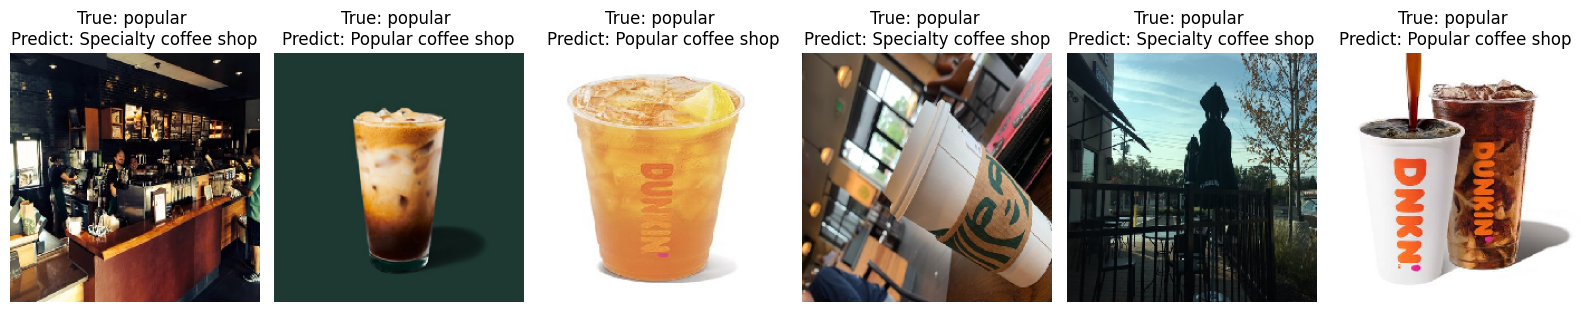

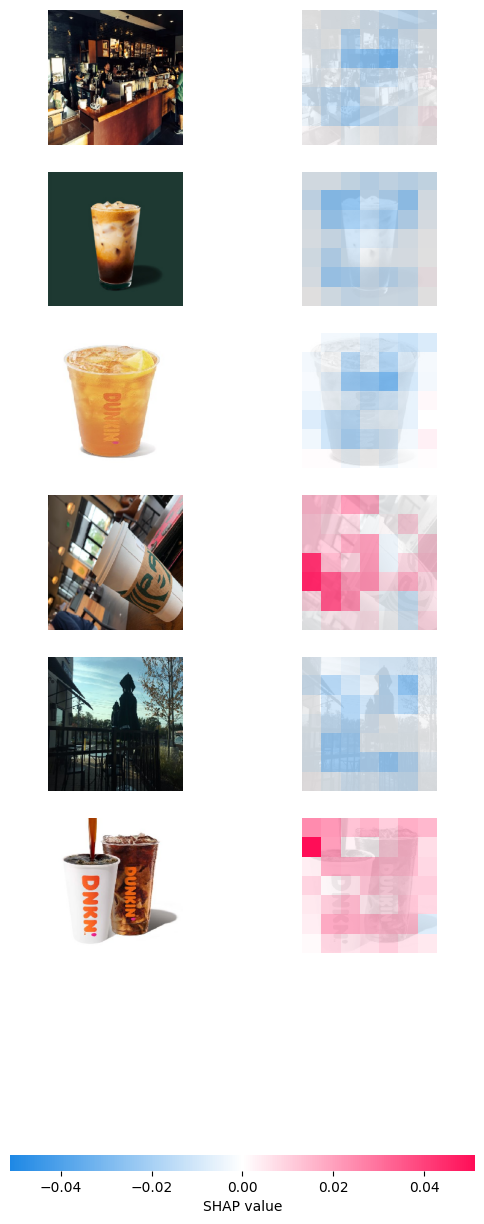

In [119]:
visualize_predictions(model, 6)

In [102]:
#use Kernel SHAP to explain the network's predictions
background = train_features[np.random.choice(train_features.shape[0], 100, replace=False)]
explainer = shap.KernelExplainer(model, backgrxound)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    shap_values = explainer.shap_values(np.ones((1,50)), nsamples=1000)

NameError: name 'warnings' is not defined